In [88]:
import pm4py

### FILTER AND VISUALIZE MOV DATA
### FILTERED BY OBJECTS AND EVENTUALLY TIMESTAMP


def vis_write_ocel(scene: str, filter: bool, keep_object: bool, filter_timestamp: bool, process_instance: str, objects: list, min_timest: str, max_timest: str):

    mov_log_ocel = pm4py.read_ocel_json(f'../dataProcessing/sceneMovOCEL/scene{scene}_mov.jsonocel')

    if not filter:
        # Visualize OCEL without filtering
        ocel_vis = pm4py.ocel.discover_ocdfg(mov_log_ocel)
        pm4py.vis.view_ocdfg(ocel_vis)
        
        print(mov_log_ocel)

        # Write OCEL to file
        # ocel_path = f'../dataProcessing/filteredMovOCEL/filtered_mov{scene}_{process_instance}.jsonocel'
        # pm4py.write_ocel_json(mov_log_ocel, ocel_path)
        
    else:
        # Apply object filtering
        filtered_ocel = pm4py.filtering.filter_ocel_objects(
            mov_log_ocel, object_identifiers=objects, positive=keep_object, level=2
        )
        
        if filter_timestamp:
            # Apply timestamp filtering
            filtered_ocel_timestamp = pm4py.filtering.filter_ocel_events_timestamp(
                filtered_ocel, min_timest=min_timest, max_timest=max_timest, timestamp_key='ocel:timestamp'
            )
            ocel_vis = pm4py.ocel.discover_ocdfg(filtered_ocel_timestamp)
            pm4py.vis.view_ocdfg(ocel_vis)
        
            print(filtered_ocel_timestamp)

            # Write OCEL to file
            # ocel_path = f'../dataProcessing/filteredMovOCEL/filtered_mov{scene}_{process_instance}.jsonocel'
            # pm4py.write_ocel_json(filtered_ocel_timestamp, ocel_path)
        
        else:
            # Visualize filtered OCEL
            ocel_vis = pm4py.ocel.discover_ocdfg(filtered_ocel)
            pm4py.vis.view_ocdfg(ocel_vis)
        
            print(filtered_ocel)

            # Write OCEL to file
            # ocel_path = f'../dataProcessing/filteredMovOCEL/filtered_mov{scene}_{process_instance}.jsonocel'
            # pm4py.write_ocel_json(filtered_ocel, ocel_path)

In [89]:
import pm4py
import json


## DUE TO THE TIMESTAMP FILTER, SOME ACTIVITIES WHICH NOT RELATED TO FILTERED SCENE / PROCESS INSTANCE or REFERENCED TO ASSIGNED OBJECT were INCLUDED
## DELETE ALL THE ACTIVITIES THAT DON'T HAVE ASSIGNED OBJECTS

def filter_ocel_by_objects(input_file, output_file, object_ids):
    # Load OCEL
    with open(input_file, "r") as f:
        ocel_data = json.load(f)
    
    # Filter Event based on object_ids
    filtered_events = {
        event_id: event
        for event_id, event in ocel_data["ocel:events"].items()
        if any(obj_id in event.get("ocel:omap", []) for obj_id in object_ids)
    }

    # Update filtered events in OCEL
    ocel_data["ocel:events"] = filtered_events

    # Find referenced objects
    referenced_objects = set()
    for event in filtered_events.values():
        referenced_objects.update(event.get("ocel:omap", []))
    
    # Filtered objects based on the referenced ids
    filtered_objects = {
        obj_id: obj
        for obj_id, obj in ocel_data["ocel:objects"].items()
        if obj_id in referenced_objects
    }
    ocel_data["ocel:objects"] = filtered_objects

    # Save filtered OCEL
    with open(output_file, "w") as f:
        json.dump(ocel_data, f, indent=4)
    
    print(f"Gefiltertes OCEL wurde in {output_file} gespeichert.")

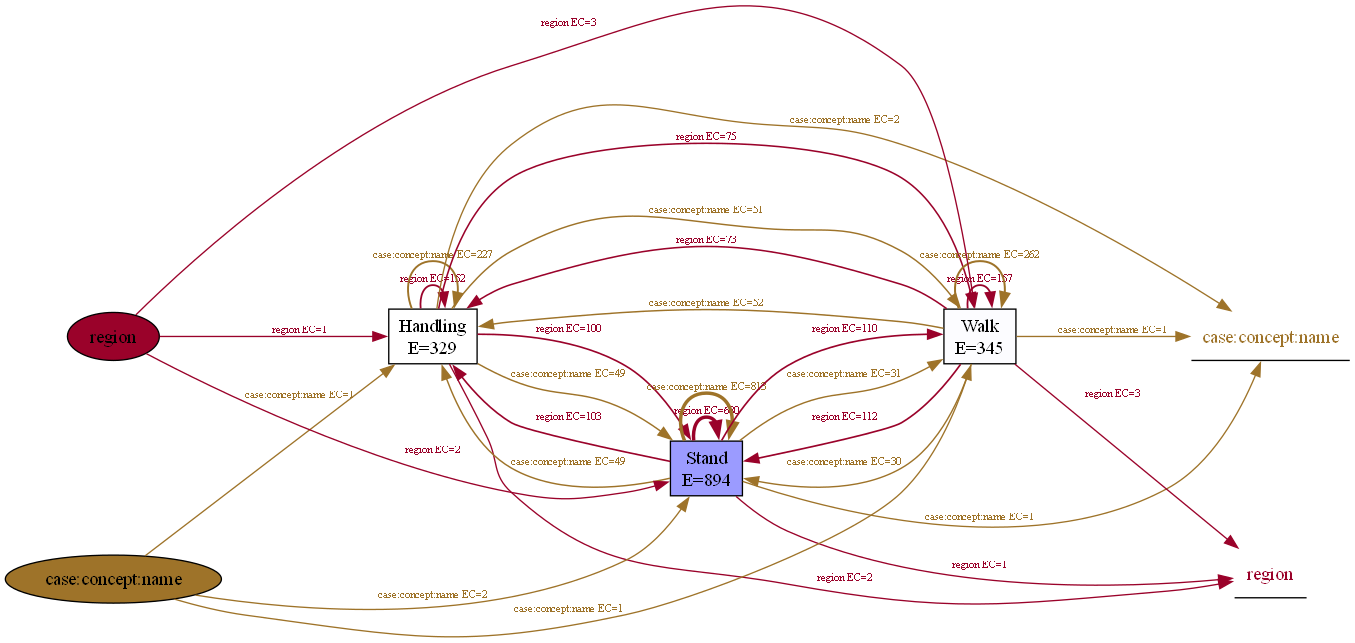

Object-Centric Event Log (number of events: 1568, number of objects: 10, number of activities: 3, number of object types: 2, events-objects relationships: 3136)
Activities occurrences: {'Stand': 894, 'Walk': 345, 'Handling': 329}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 4}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [90]:
vis_write_ocel(scene='01', filter=False, keep_object=False, filter_timestamp=False, process_instance='adtc', objects=[], min_timest='', max_timest='')

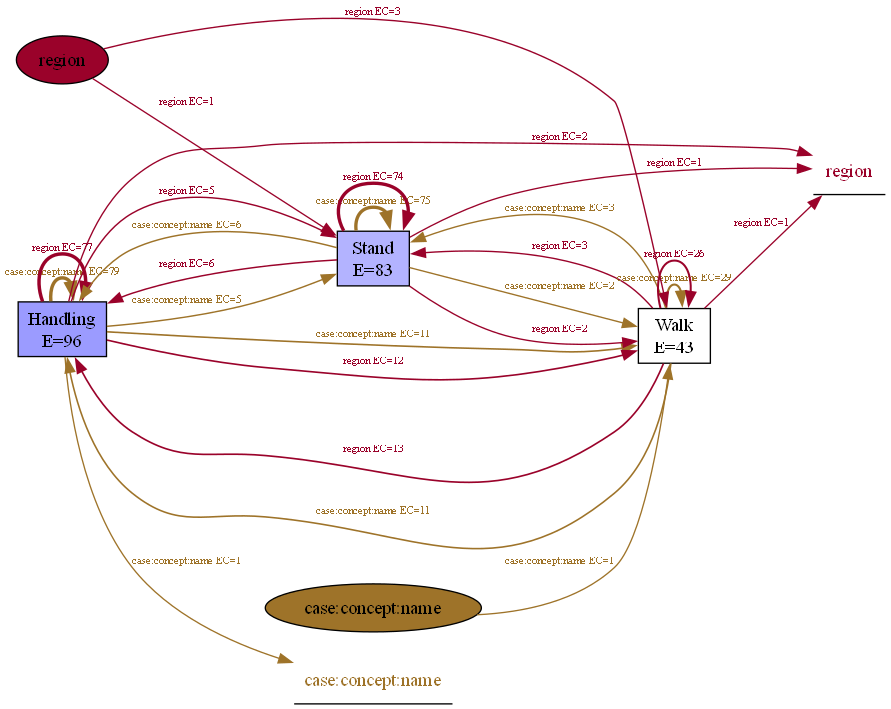

Object-Centric Event Log (number of events: 222, number of objects: 5, number of activities: 3, number of object types: 2, events-objects relationships: 444)
Activities occurrences: {'Handling': 96, 'Stand': 83, 'Walk': 43}
Object types occurrences (number of objects): {'region': 4, 'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [91]:
vis_write_ocel(scene='02', filter=False, keep_object=False, filter_timestamp=False, process_instance='nai', objects=[], min_timest='', max_timest='')

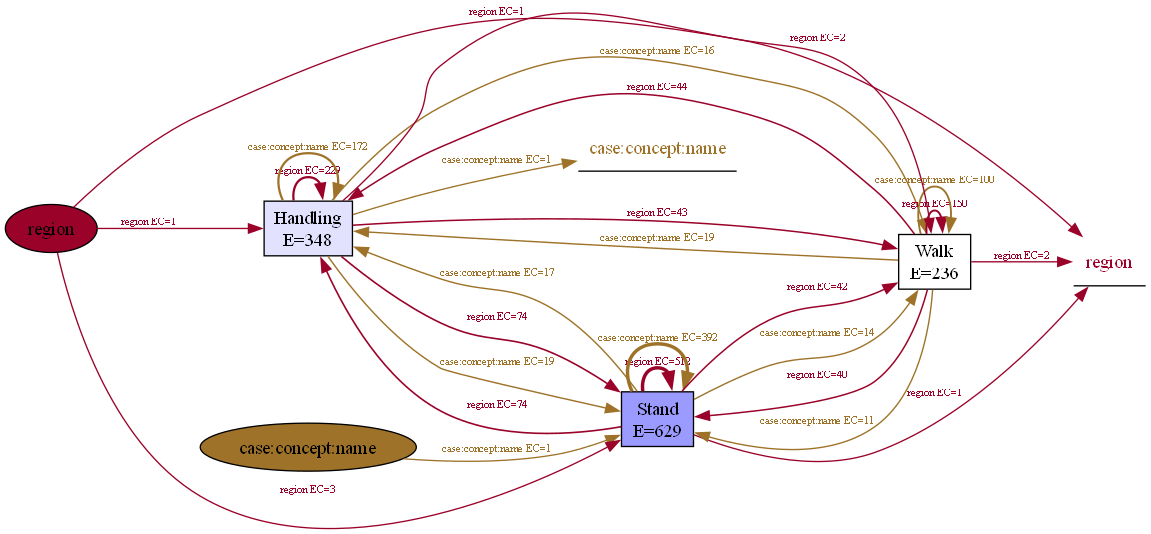

Object-Centric Event Log (number of events: 1213, number of objects: 6, number of activities: 3, number of object types: 2, events-objects relationships: 1974)
Activities occurrences: {'Stand': 629, 'Handling': 348, 'Walk': 236}
Object types occurrences (number of objects): {'region': 5, 'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [92]:
vis_write_ocel(scene='03', filter=True, keep_object=True, filter_timestamp=False, process_instance='nai', objects=['A1'],min_timest='', max_timest='')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov03_nai.jsonocel gespeichert.


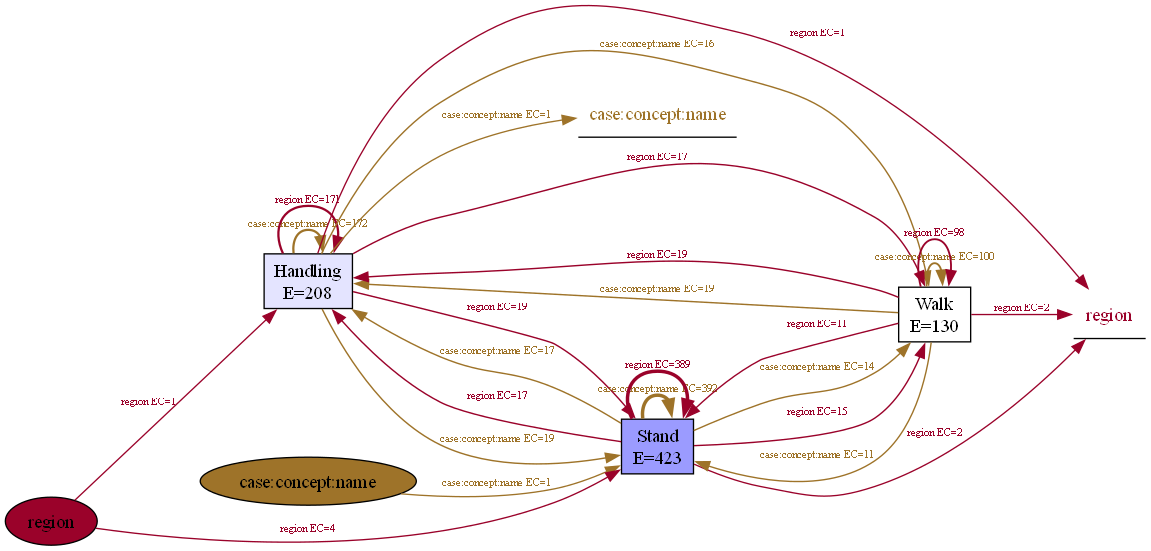

In [93]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov03_nai.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov03_nai.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=["A1"])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

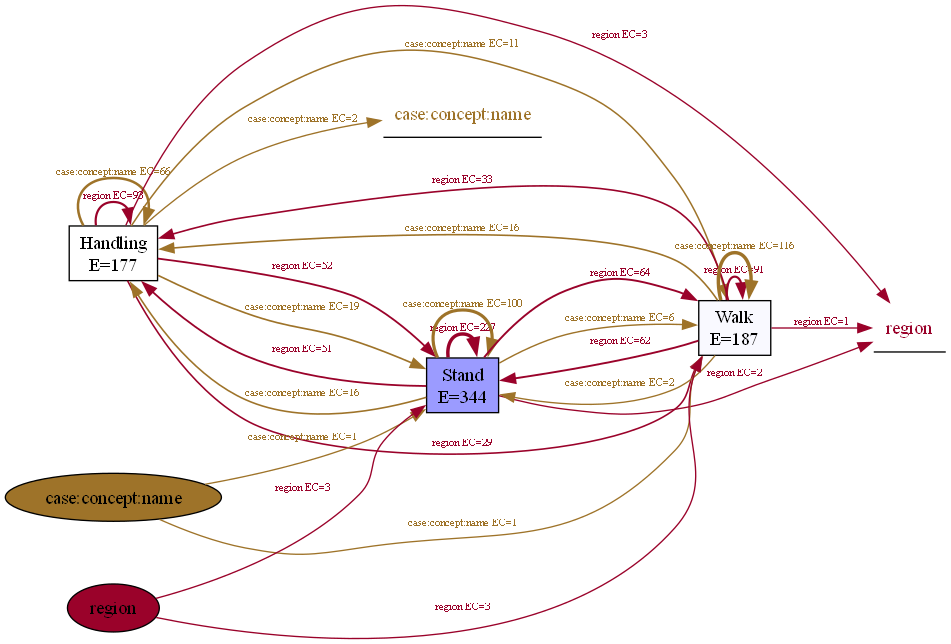

Object-Centric Event Log (number of events: 708, number of objects: 8, number of activities: 3, number of object types: 2, events-objects relationships: 1062)
Activities occurrences: {'Stand': 344, 'Walk': 187, 'Handling': 177}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [94]:
vis_write_ocel(scene='03', filter=True, keep_object=True, filter_timestamp=True, process_instance='ssaco', objects=['C5', 'C6'], min_timest='2024-03-25 09:14:13', max_timest='2024-03-25 09:17:09')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov03_ssaco.jsonocel gespeichert.


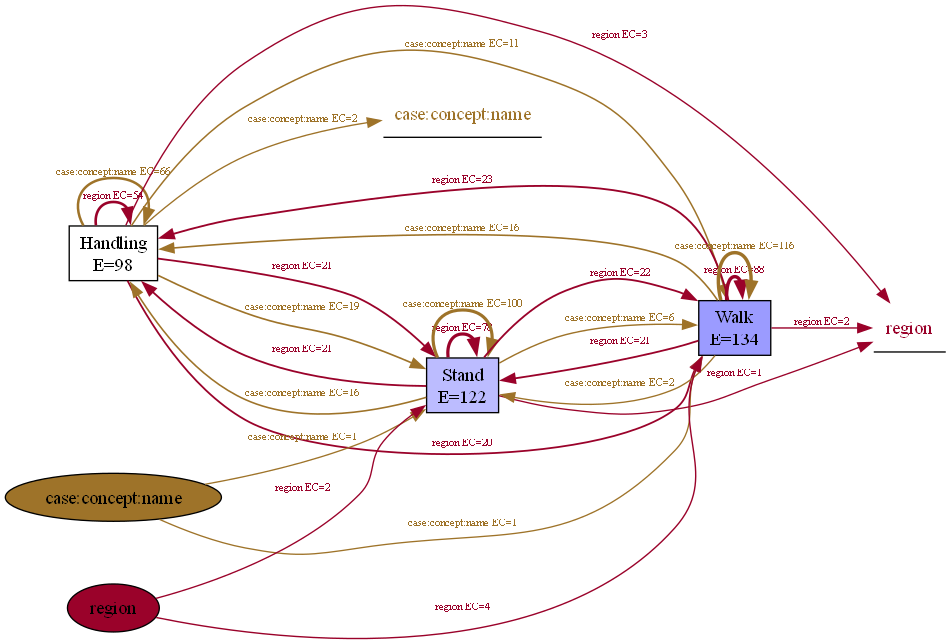

In [95]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov03_ssaco.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov03_ssaco.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C5', 'C6'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

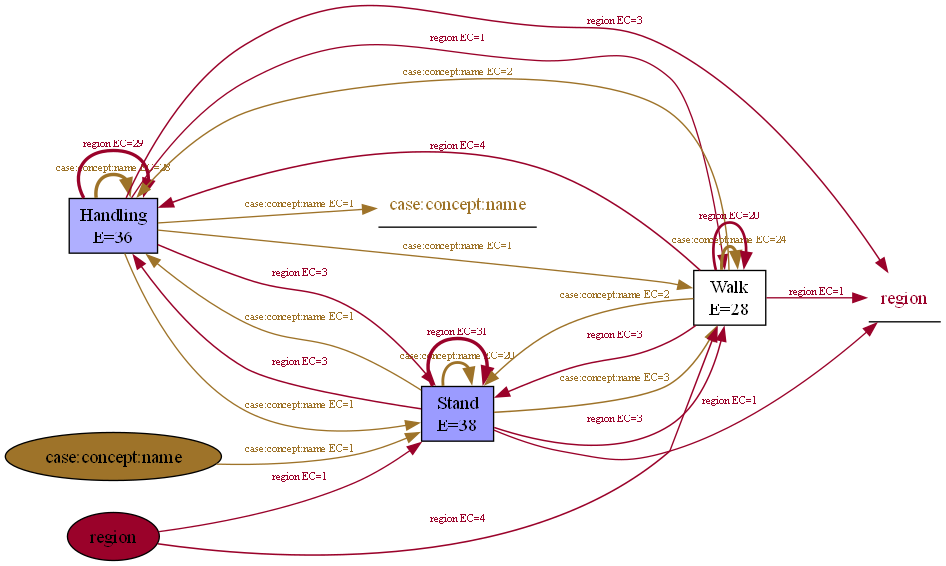

Object-Centric Event Log (number of events: 102, number of objects: 6, number of activities: 3, number of object types: 2, events-objects relationships: 185)
Activities occurrences: {'Stand': 38, 'Handling': 36, 'Walk': 28}
Object types occurrences (number of objects): {'region': 5, 'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [96]:
vis_write_ocel(scene='04', filter=True, keep_object=True, filter_timestamp=True, process_instance='nai', objects=['A1'],min_timest='2024-03-25 09:20:11', max_timest='2024-03-25 09:21:33')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov04_nai.jsonocel gespeichert.


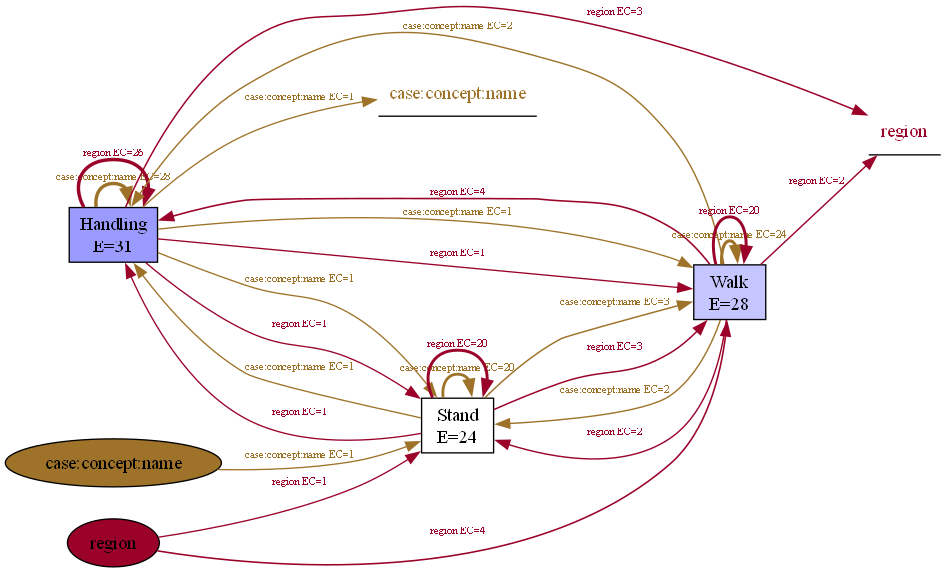

In [97]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov04_nai.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov04_nai.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['A1'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

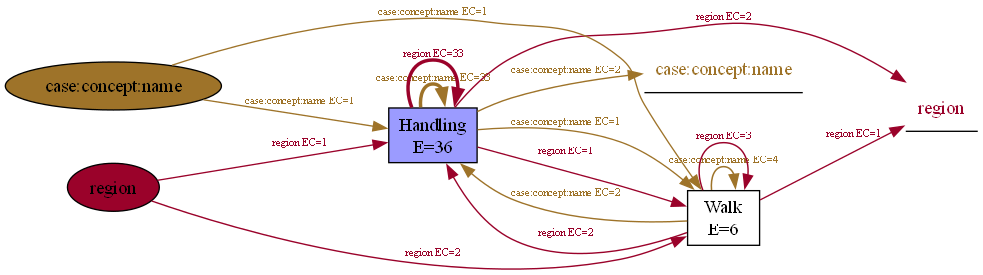

Object-Centric Event Log (number of events: 42, number of objects: 5, number of activities: 2, number of object types: 2, events-objects relationships: 84)
Activities occurrences: {'Handling': 36, 'Walk': 6}
Object types occurrences (number of objects): {'region': 3, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [98]:
vis_write_ocel(scene='05', filter=True, keep_object=False, filter_timestamp=True, process_instance='ssaco', objects='', min_timest='2024-03-25 09:26:10', max_timest='2024-03-25 09:26:30')

In [99]:
# no need to delete non-human-assigned activities
# input_path = "../dataProcessing/filteredMovOCEL/filtered_mov05_ssaco.jsonocel"  # Pfad zur Eingabedatei
# output_path = "../dataProcessing/filteredMovOCEL/filtered_mov05_ssaco.jsonocel"  # Pfad zur Ausgabedatei
# filter_ocel_by_objects(input_path, output_path, object_ids=['C4', 'A1'])

# ocel_path = pm4py.read_ocel_json(output_path)
# ocel = pm4py.discover_ocdfg(ocel_path)
# pm4py.vis.view_ocdfg(ocel)

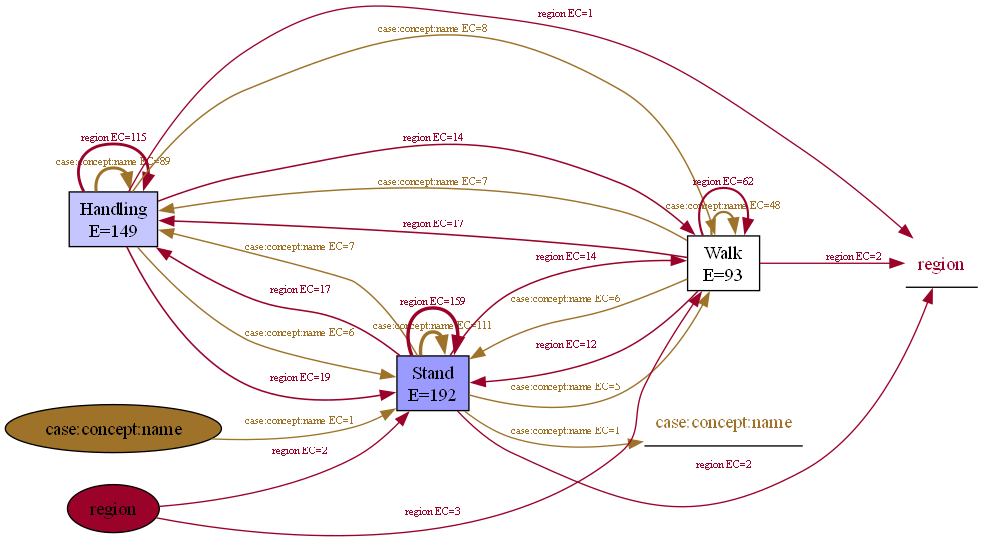

Object-Centric Event Log (number of events: 434, number of objects: 6, number of activities: 3, number of object types: 2, events-objects relationships: 722)
Activities occurrences: {'Stand': 192, 'Handling': 149, 'Walk': 93}
Object types occurrences (number of objects): {'region': 5, 'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [100]:
vis_write_ocel(scene='06', filter=True, keep_object=True, filter_timestamp=True, process_instance='nai', objects=['A1'], min_timest='2024-03-25 09:30:02', max_timest='2024-03-25 09:34:49')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov06_nai.jsonocel gespeichert.


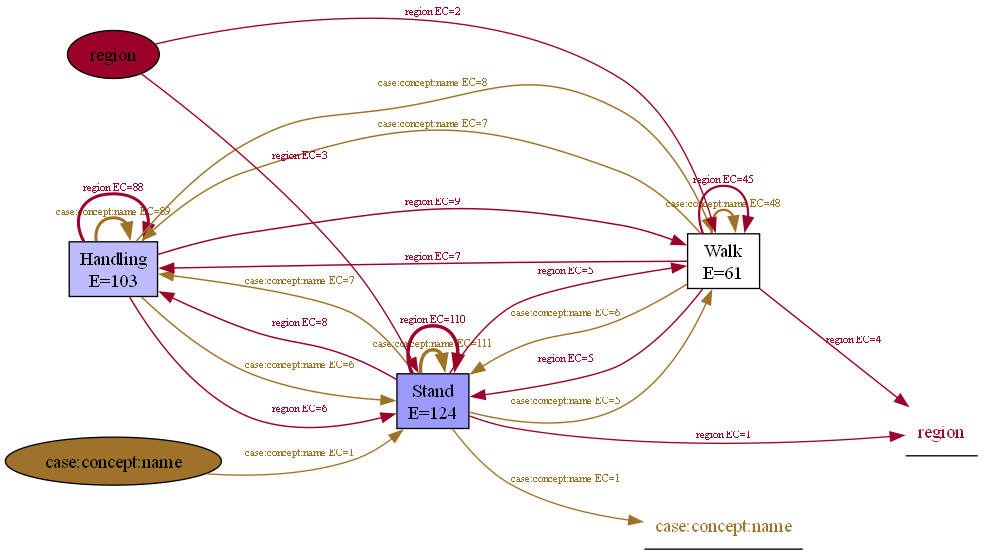

In [101]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov06_nai.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov06_nai.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['A1'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

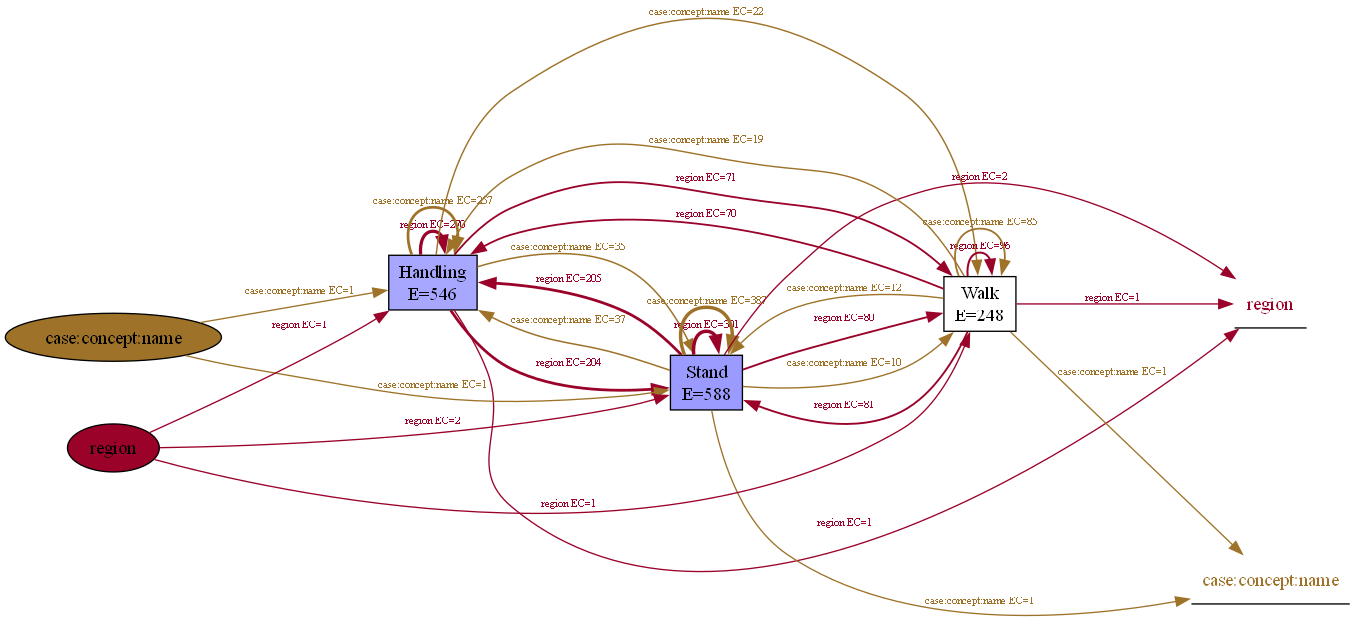

Object-Centric Event Log (number of events: 1382, number of objects: 6, number of activities: 3, number of object types: 2, events-objects relationships: 2248)
Activities occurrences: {'Stand': 588, 'Handling': 546, 'Walk': 248}
Object types occurrences (number of objects): {'region': 4, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [102]:
vis_write_ocel(scene='06', filter=True, keep_object=True, filter_timestamp=False, process_instance='ssaco', objects=['C10', 'C9'], min_timest='', max_timest='')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov06_ssaco.jsonocel gespeichert.


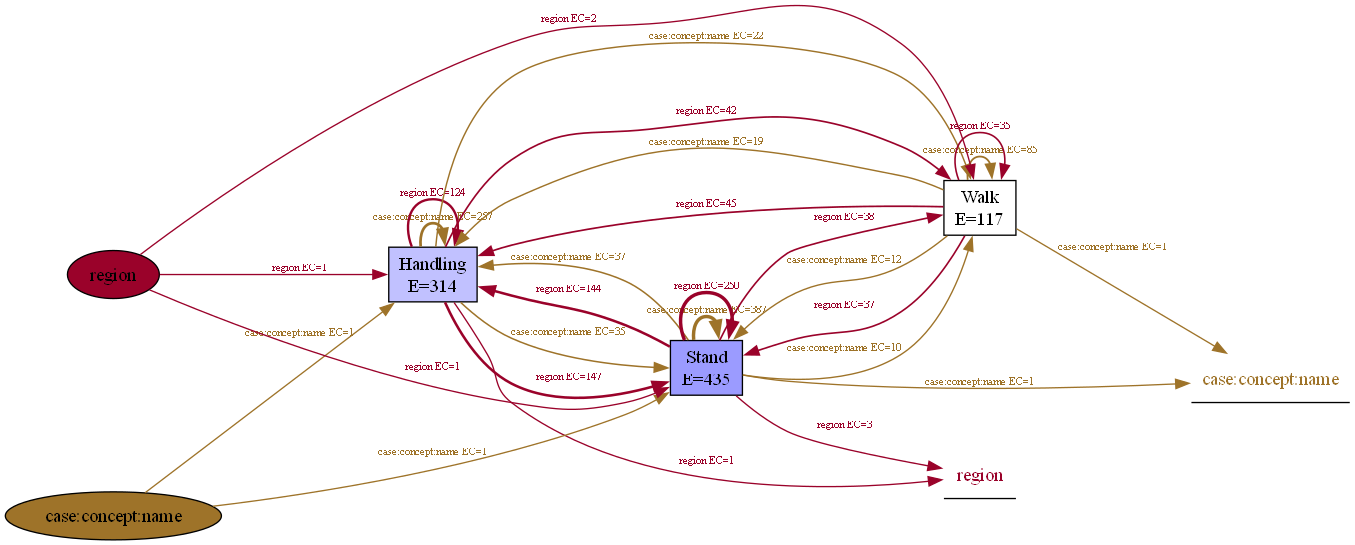

In [103]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov06_ssaco.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov06_ssaco.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C10', 'C9'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

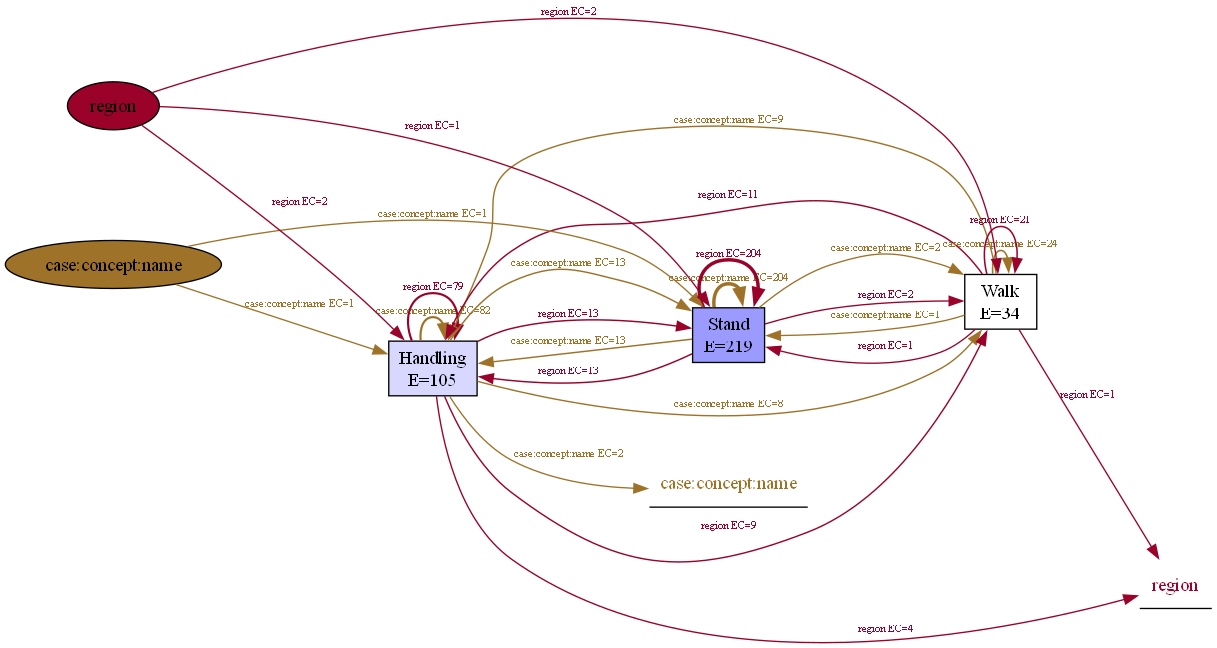

Object-Centric Event Log (number of events: 358, number of objects: 7, number of activities: 3, number of object types: 2, events-objects relationships: 716)
Activities occurrences: {'Stand': 219, 'Handling': 105, 'Walk': 34}
Object types occurrences (number of objects): {'region': 5, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [104]:
vis_write_ocel(scene='07', filter=True, keep_object=True, filter_timestamp=True, process_instance='nai', objects=['A1','C8'], min_timest='2024-03-25 09:39:50', max_timest='2024-03-25 09:42:48')

In [105]:
# no need to delete non-human-assigned activities
# input_path = "../dataProcessing/filteredMovOCEL/filtered_mov07_nai.jsonocel"  # Pfad zur Eingabedatei
# output_path = "../dataProcessing/filteredMovOCEL/filtered_mov07_nai.jsonocel"  # Pfad zur Ausgabedatei
# filter_ocel_by_objects(input_path, output_path, object_ids=['A1', 'C8'])

# ocel_path = pm4py.read_ocel_json(output_path)
# ocel = pm4py.discover_ocdfg(ocel_path)
# pm4py.vis.view_ocdfg(ocel)

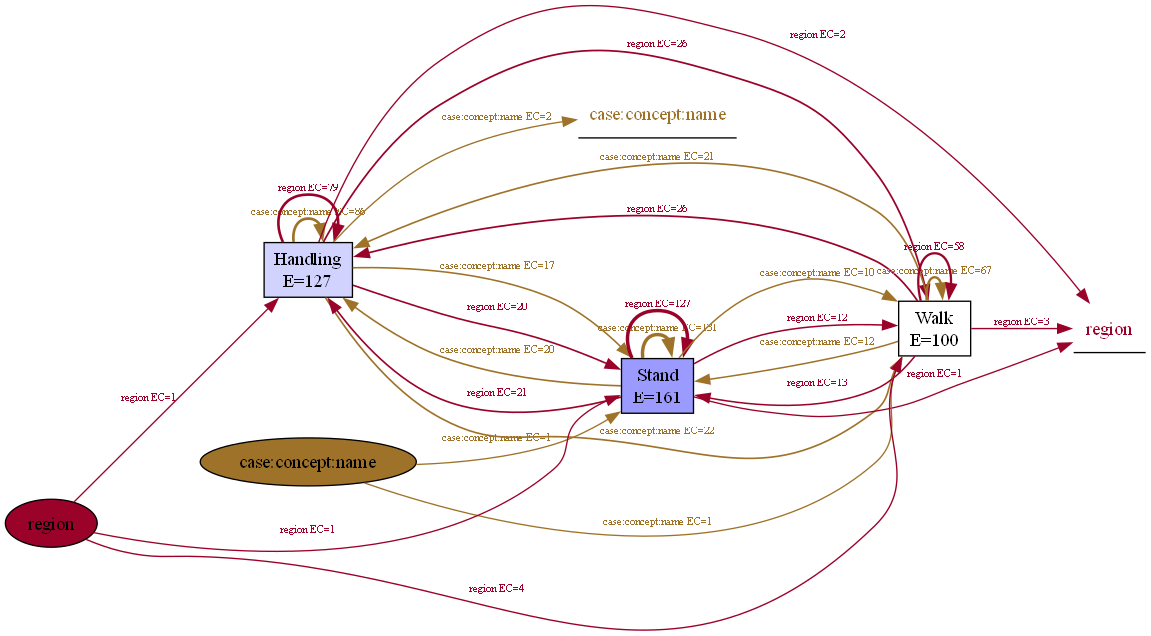

Object-Centric Event Log (number of events: 388, number of objects: 8, number of activities: 3, number of object types: 2, events-objects relationships: 776)
Activities occurrences: {'Stand': 161, 'Handling': 127, 'Walk': 100}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [106]:
vis_write_ocel(scene='07', filter=True, keep_object=True, filter_timestamp=True, process_instance='adtc', objects=['A1','C8'], min_timest='2024-03-25 09:42:16', max_timest='2024-03-25 09:45:29') 

In [107]:
# no need delete non-human-assigned activities
# input_path = "../dataProcessing/filteredMovOCEL/filtered_mov07_adtc.jsonocel"  # Pfad zur Eingabedatei
# output_path = "../dataProcessing/filteredMovOCEL/filtered_mov07_adtc.jsonocel"  # Pfad zur Ausgabedatei
# filter_ocel_by_objects(input_path, output_path, object_ids=['A1', 'C8'])

# ocel_path = pm4py.read_ocel_json(output_path)
# ocel = pm4py.discover_ocdfg(ocel_path)
# pm4py.vis.view_ocdfg(ocel)

#### Exclude scene 8, because in which the process instances are not relevant to Thema 5

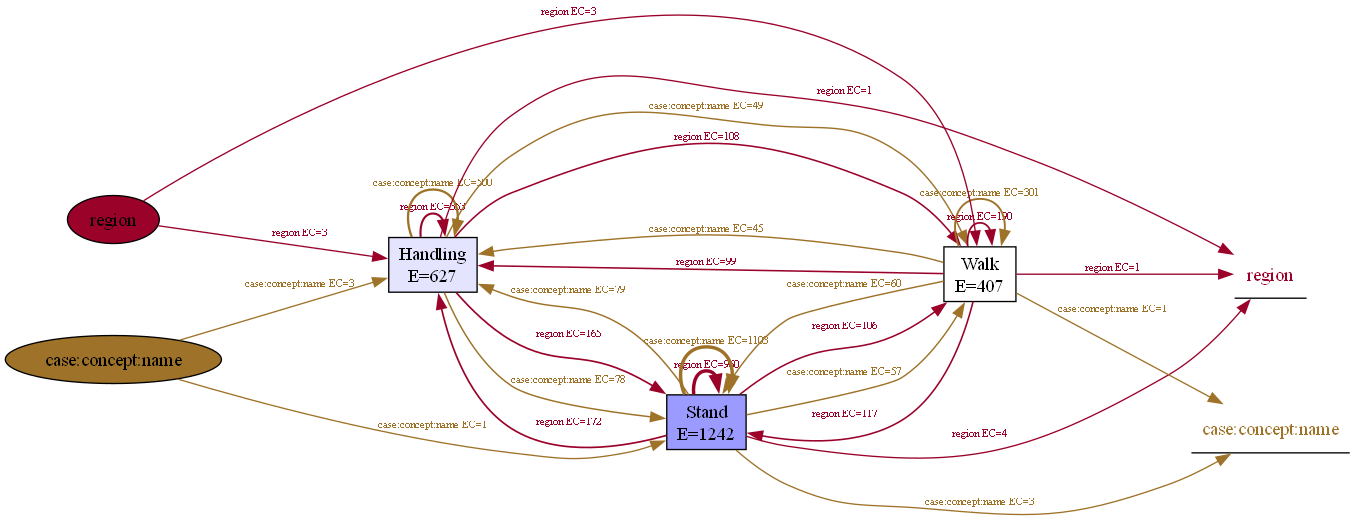

Object-Centric Event Log (number of events: 2276, number of objects: 10, number of activities: 3, number of object types: 2, events-objects relationships: 4552)
Activities occurrences: {'Stand': 1242, 'Handling': 627, 'Walk': 407}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 4}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [108]:
vis_write_ocel(scene='09', filter=False, keep_object=False, filter_timestamp=False, process_instance='adtc', objects='', min_timest='', max_timest='')

In [109]:
# no need to delete non-human-assigned activities
# input_path = "../dataProcessing/filteredMovOCEL/filtered_mov09_adtc.jsonocel"  # Pfad zur Eingabedatei
# output_path = "../dataProcessing/filteredMovOCEL/filtered_mov09_adtc.jsonocel"  # Pfad zur Ausgabedatei
# filter_ocel_by_objects(input_path, output_path, object_ids=['A2', 'C3', 'C1', 'C2'])

# ocel_path = pm4py.read_ocel_json(output_path)
# ocel = pm4py.discover_ocdfg(ocel_path)
# pm4py.vis.view_ocdfg(ocel)

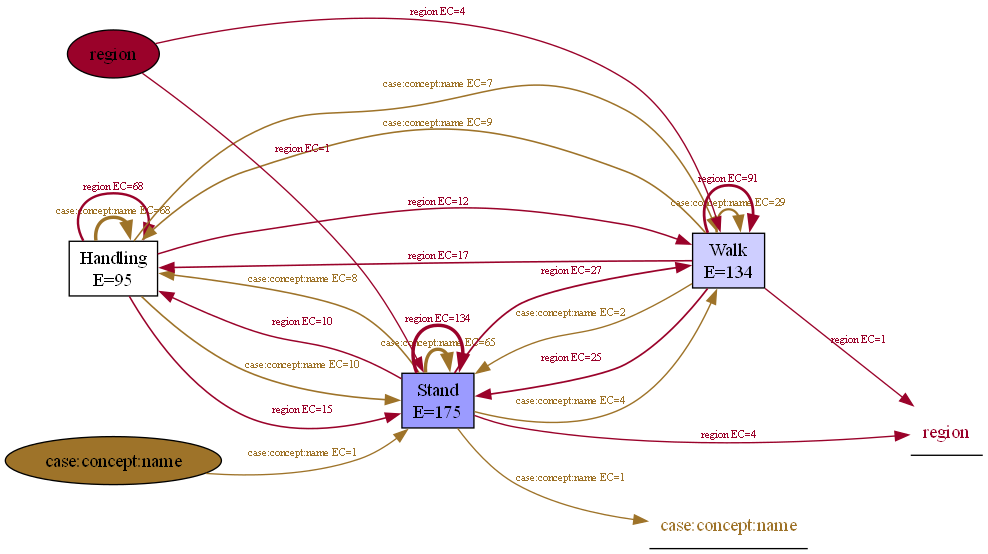

Object-Centric Event Log (number of events: 404, number of objects: 6, number of activities: 3, number of object types: 2, events-objects relationships: 607)
Activities occurrences: {'Stand': 175, 'Walk': 134, 'Handling': 95}
Object types occurrences (number of objects): {'region': 5, 'case:concept:name': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [110]:
vis_write_ocel(scene='10', filter=True, keep_object=True, filter_timestamp=True, process_instance='nai', objects=['A2'], min_timest='2024-03-25 10:58:14', max_timest='2024-03-25 11:01:36')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov10_nai.jsonocel gespeichert.


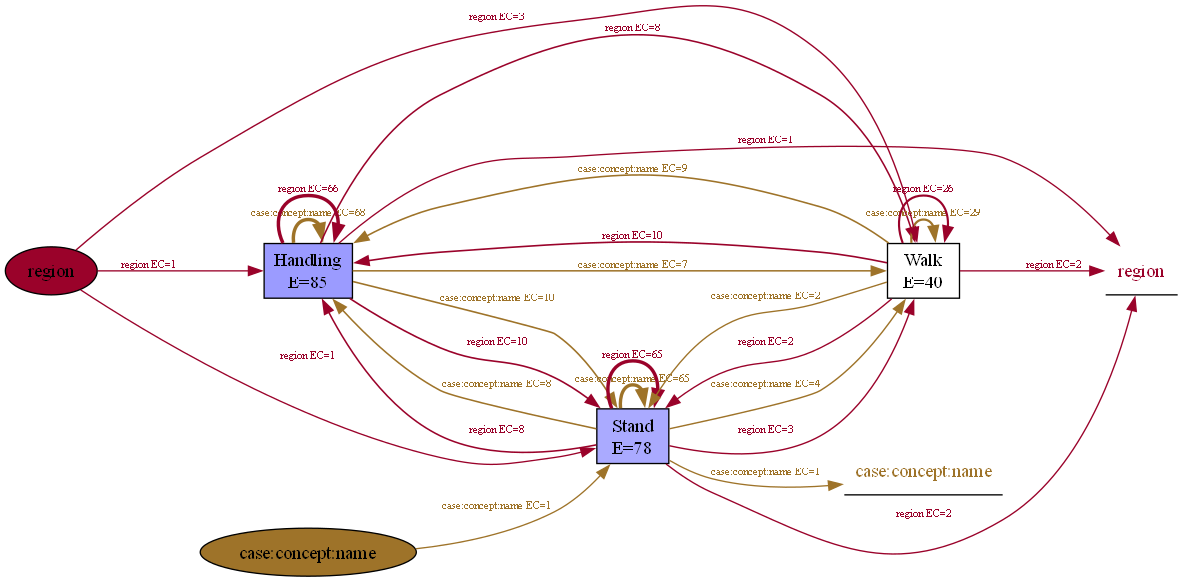

In [111]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov10_nai.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov10_nai.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['A2'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

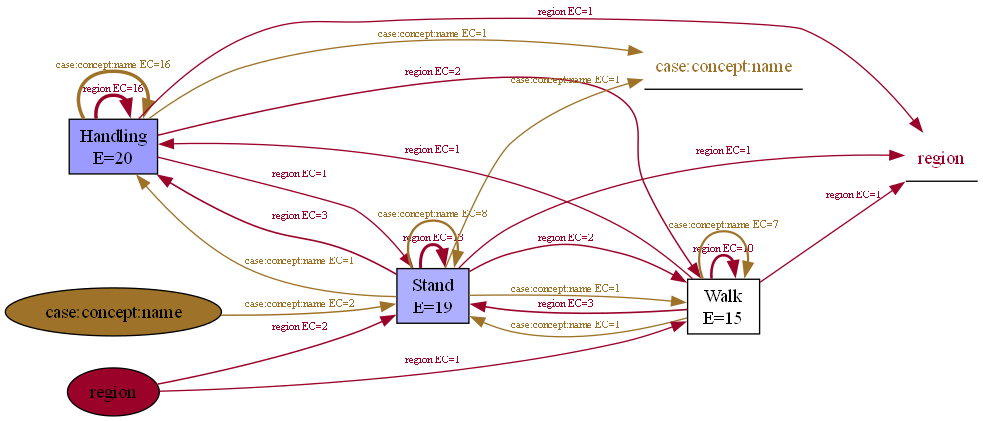

Object-Centric Event Log (number of events: 54, number of objects: 5, number of activities: 3, number of object types: 2, events-objects relationships: 90)
Activities occurrences: {'Handling': 20, 'Stand': 19, 'Walk': 15}
Object types occurrences (number of objects): {'region': 3, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


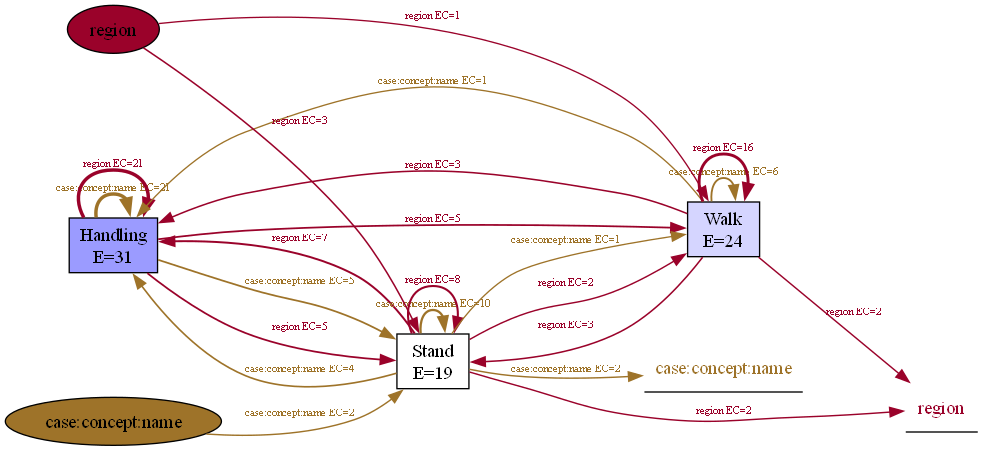

Object-Centric Event Log (number of events: 74, number of objects: 6, number of activities: 3, number of object types: 2, events-objects relationships: 124)
Activities occurrences: {'Handling': 31, 'Walk': 24, 'Stand': 19}
Object types occurrences (number of objects): {'region': 4, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [112]:
vis_write_ocel(scene='11', filter=True, keep_object=True, filter_timestamp=True, process_instance='ssaco1', objects=['C3', 'A2'], min_timest='2024-03-25 11:13:37', max_timest='2024-03-25 11:13:54')

vis_write_ocel(scene='11', filter=True, keep_object=True, filter_timestamp=True, process_instance='ssaco2', objects=['C9', 'A2'], min_timest='2024-03-25 11:14:27', max_timest='2024-03-25 11:14:51')


Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov11_ssaco1.jsonocel gespeichert.


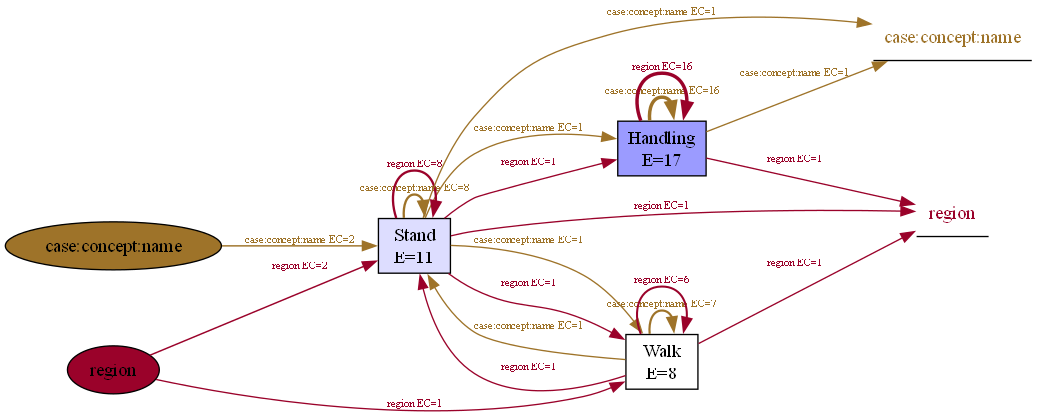

In [113]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov11_ssaco1.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov11_ssaco1.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C3', 'A2'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov11_ssaco2.jsonocel gespeichert.


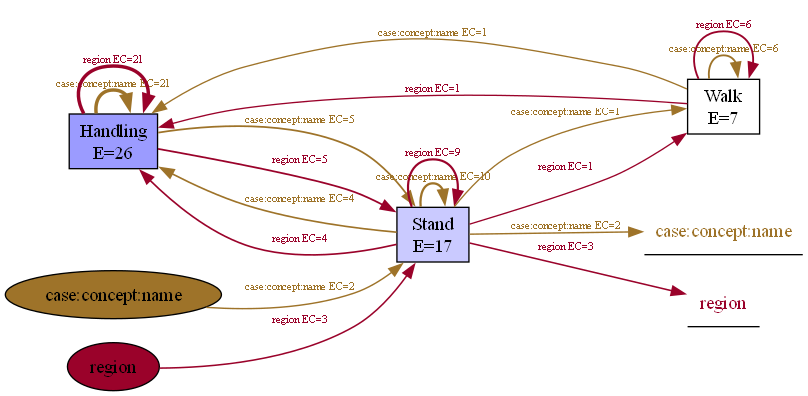

In [114]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov11_ssaco2.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov11_ssaco2.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C9', 'A2'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

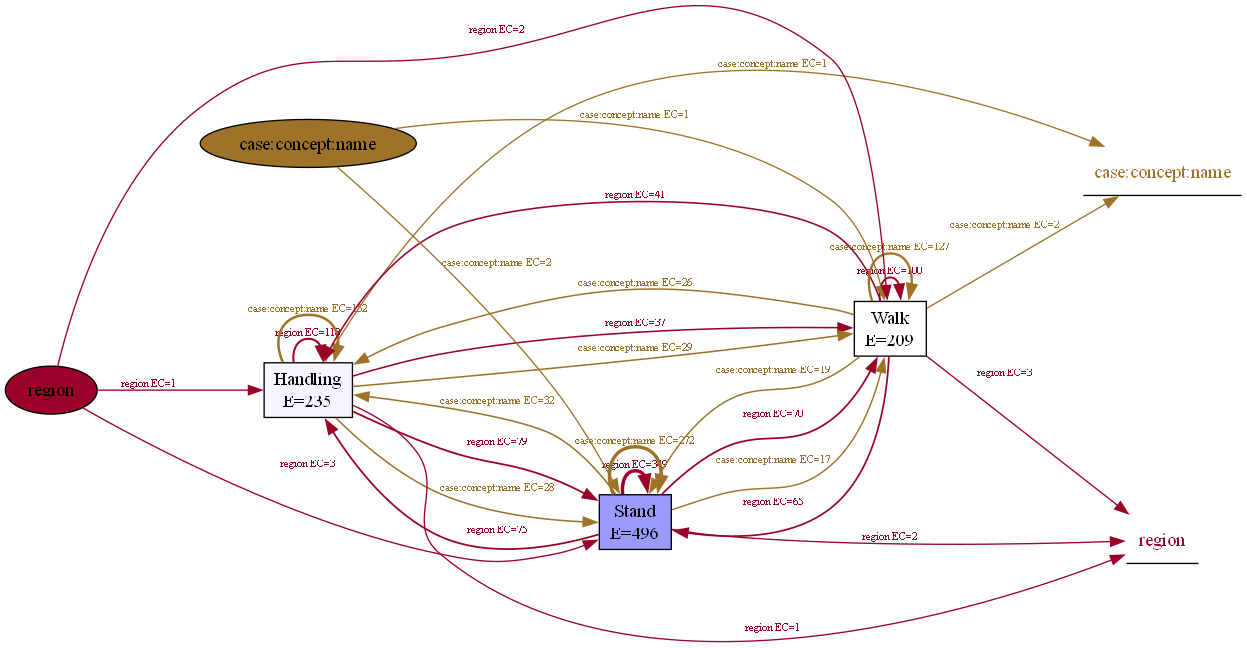

Object-Centric Event Log (number of events: 940, number of objects: 9, number of activities: 3, number of object types: 2, events-objects relationships: 1645)
Activities occurrences: {'Stand': 496, 'Handling': 235, 'Walk': 209}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 3}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [115]:
vis_write_ocel(scene='12', filter=True, keep_object=True, filter_timestamp=True, process_instance='adtc', objects=['C4', 'A2', 'C5'], min_timest='2024-03-25 11:19:41', max_timest='2024-03-25 11:23:35')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov12_adtc.jsonocel gespeichert.


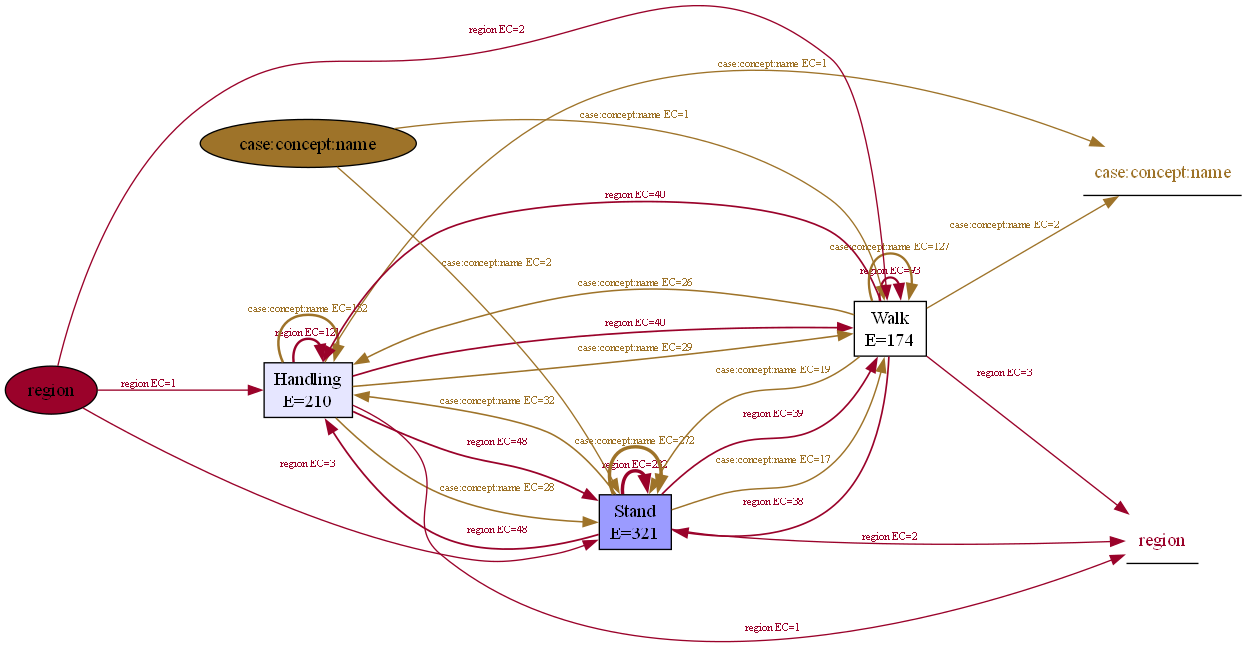

In [116]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov12_adtc.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov12_adtc.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C4', 'A2', 'C5'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

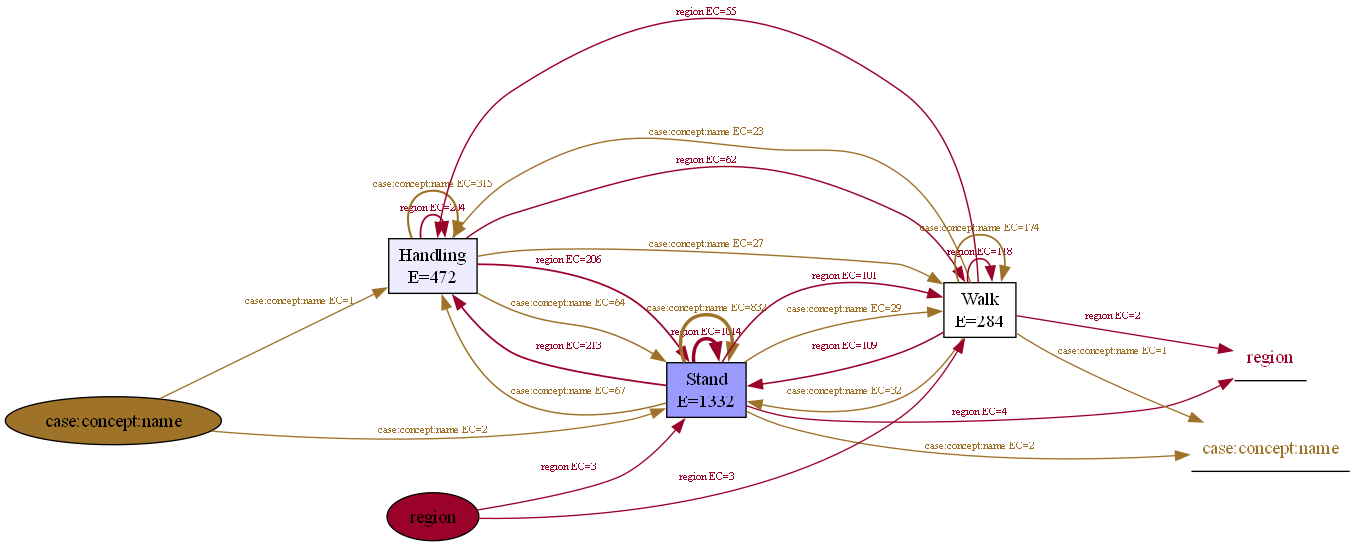

Object-Centric Event Log (number of events: 2088, number of objects: 9, number of activities: 3, number of object types: 2, events-objects relationships: 3654)
Activities occurrences: {'Stand': 1332, 'Handling': 472, 'Walk': 284}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 3}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [117]:
vis_write_ocel(scene='13', filter=True, keep_object=True, filter_timestamp=True, process_instance='adtc', objects=['C7', 'A2', 'C8'], min_timest='2024-03-25 11:31:40', max_timest='2024-03-25 11:40:21')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov13_adtc.jsonocel gespeichert.


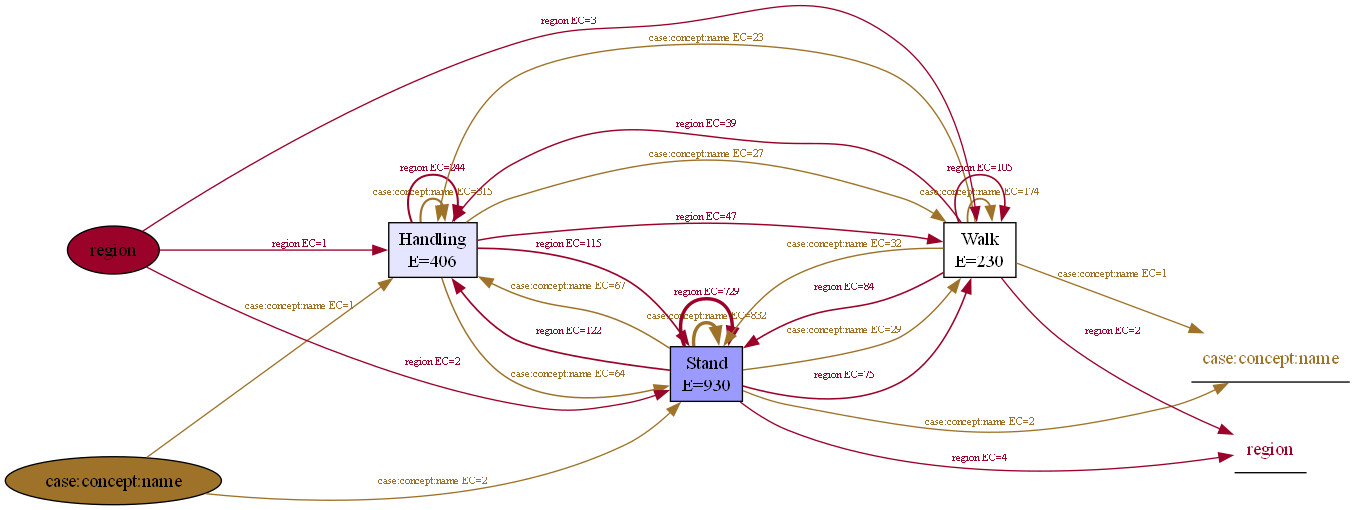

In [118]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov13_adtc.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov13_adtc.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C7', 'A2', 'C8'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

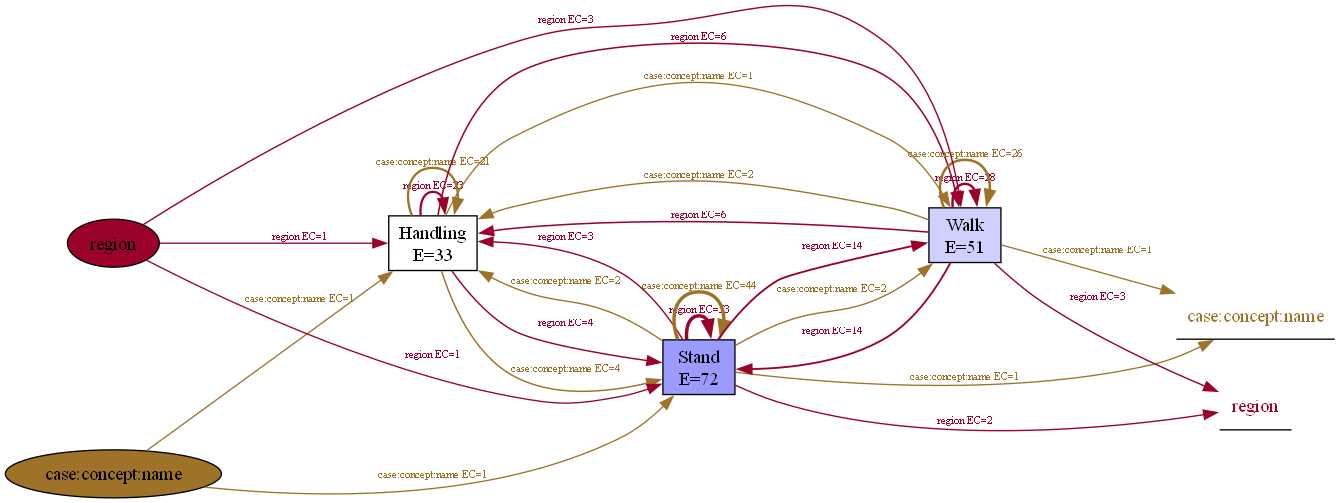

Object-Centric Event Log (number of events: 156, number of objects: 7, number of activities: 3, number of object types: 2, events-objects relationships: 260)
Activities occurrences: {'Stand': 72, 'Walk': 51, 'Handling': 33}
Object types occurrences (number of objects): {'region': 5, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [119]:
vis_write_ocel(scene='14', filter=True, keep_object=True, filter_timestamp=True, process_instance='ssaco', objects=['C3', 'A2'], min_timest='2024-03-25 11:50:46', max_timest='2024-03-25 11:51:37')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov14_ssaco.jsonocel gespeichert.


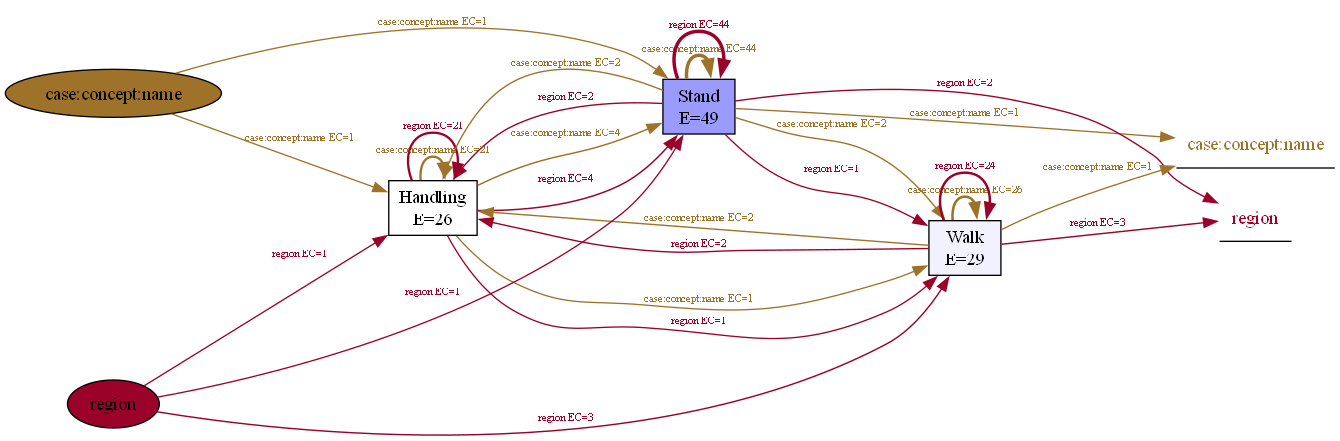

In [120]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov14_ssaco.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov14_ssaco.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C3', 'A2'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

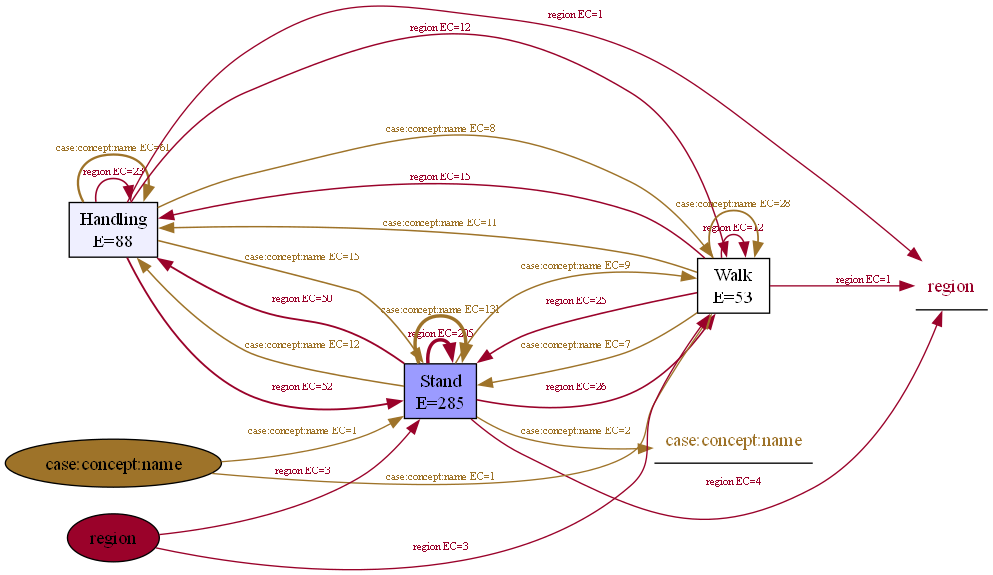

Object-Centric Event Log (number of events: 426, number of objects: 8, number of activities: 3, number of object types: 2, events-objects relationships: 710)
Activities occurrences: {'Stand': 285, 'Handling': 88, 'Walk': 53}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


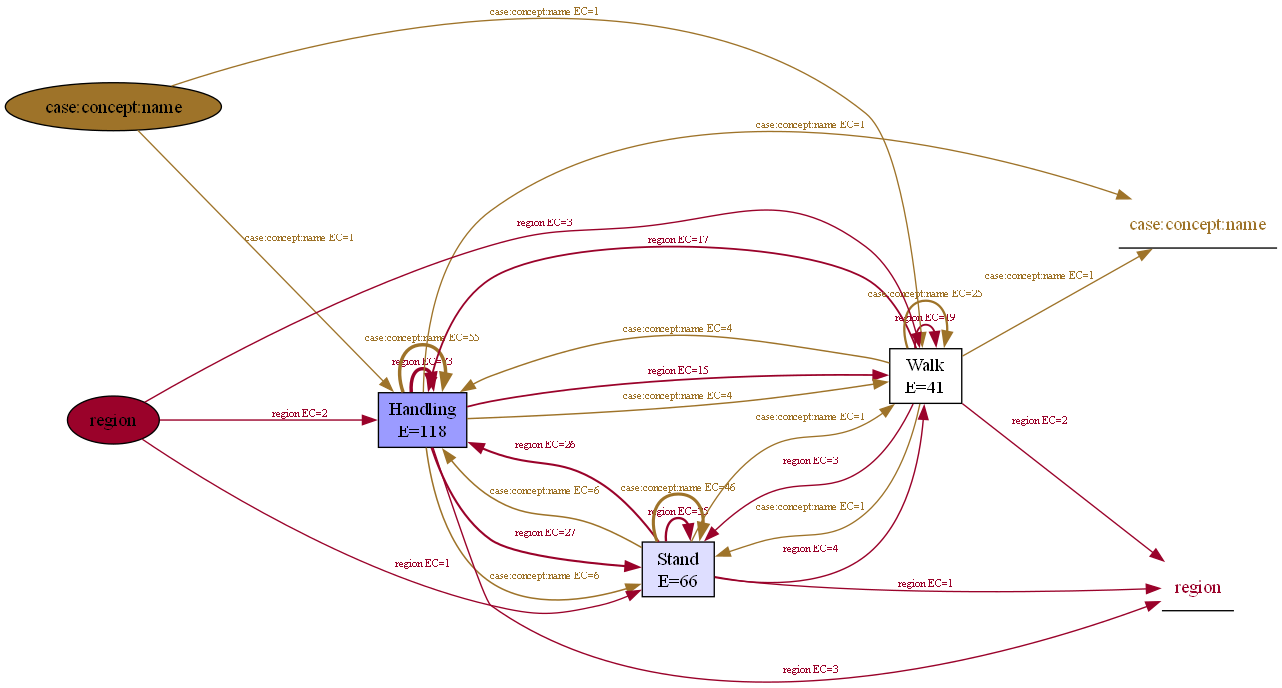

Object-Centric Event Log (number of events: 225, number of objects: 8, number of activities: 3, number of object types: 2, events-objects relationships: 375)
Activities occurrences: {'Handling': 118, 'Stand': 66, 'Walk': 41}
Object types occurrences (number of objects): {'region': 6, 'case:concept:name': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [121]:
vis_write_ocel(scene='15', filter=True, keep_object=True, filter_timestamp=True, process_instance='adtc1', objects=['C3', 'A2'], min_timest='2024-03-25 11:55:47', max_timest='2024-03-25 11:58:08')
vis_write_ocel(scene='15', filter=True, keep_object=True, filter_timestamp=True, process_instance='adtc2', objects=['C2', 'A2'], 
 min_timest= '2024-03-25 11:59:45', max_timest='2024-03-25 12:00:59')

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov15_adtc1.jsonocel gespeichert.


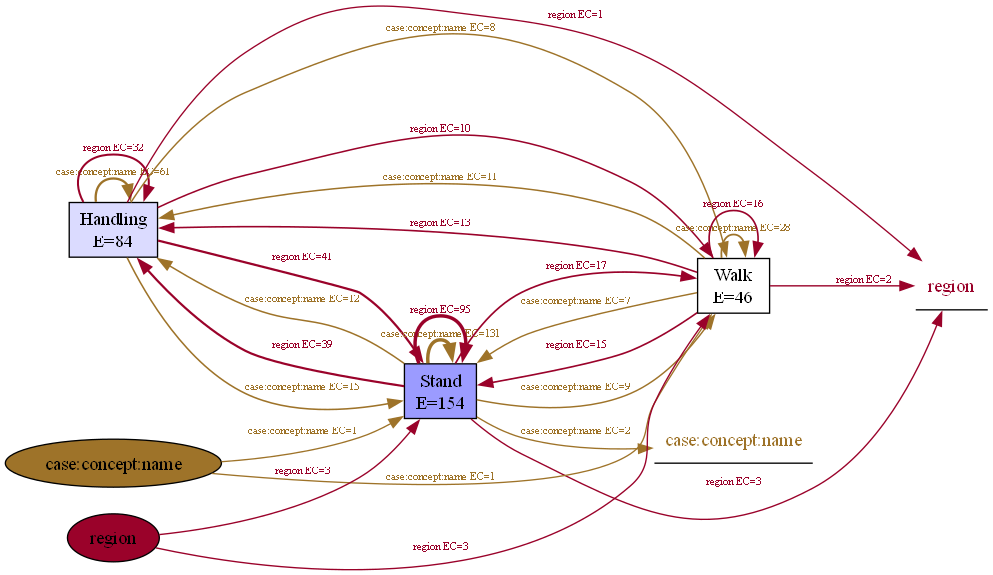

In [122]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov15_adtc1.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov15_adtc1.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C3', 'A2'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)

Gefiltertes OCEL wurde in ../dataProcessing/filteredMovOCEL/filtered_mov15_adtc2.jsonocel gespeichert.


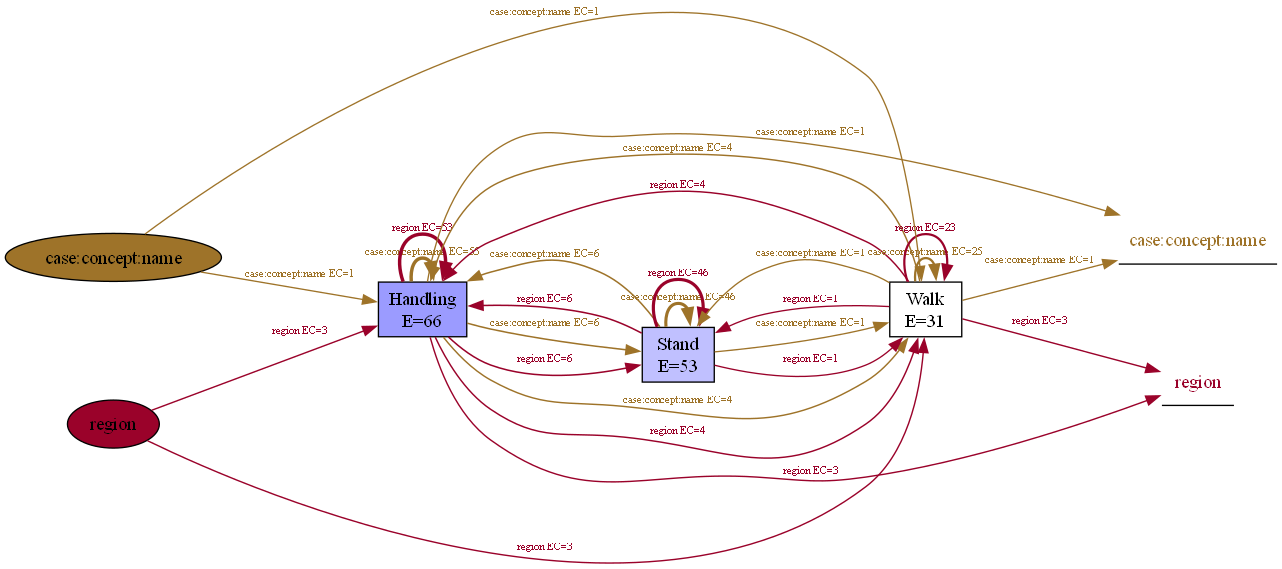

In [123]:
# delete non-human-assigned activities
input_path = "../dataProcessing/filteredMovOCEL/filtered_mov15_adtc2.jsonocel"  # Pfad zur Eingabedatei
output_path = "../dataProcessing/filteredMovOCEL/filtered_mov15_adtc2.jsonocel"  # Pfad zur Ausgabedatei
filter_ocel_by_objects(input_path, output_path, object_ids=['C2', 'A2'])

ocel_path = pm4py.read_ocel_json(output_path)
ocel = pm4py.discover_ocdfg(ocel_path)
pm4py.vis.view_ocdfg(ocel)